> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

<font color='red'>**Dataset Description:**</font>

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#check variable types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# overall summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# count % of missing values in each column
df.isna().sum()/len(df)*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [8]:
# summary stats of numeric variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# check duplication
sum(df.duplicated())
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
# print duplicated records
df[df.imdb_id=='tt0411951']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


<font color='red'>**Observations from above summary stats:**</font>
1. Most of the records have a value of 0 for the columns budget, revenue,budget_adj, and revenue_adj.
2. Among the 21 columns, 9 columns - imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies - have missing values.
3. 1 record is duplicated.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (remove unnecessary columns & problematic records)

<font color='red'>**Steps:**</font>
1. Remove the duplicated record
2. Remove columns with missing values which are not used in the further analysis
3. Remove movies with values of 0 on budget and revenue
4. Convert release_date to date format


In [11]:
# 1.Remove the duplicated record
df.drop(2090, axis=0, inplace=True)

In [12]:
# 2.Remove columns with missing values which are not used in the further analysis
cnt = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={'index':'name', 0:'null_cnt'})
cnt['missing value?'] = cnt['null_cnt'].apply(lambda x: 'True' if x > 0 else 'False')
col_null = list(cnt[cnt['missing value?'] == 'True'].name)

In [13]:
col_null # Print column names with missing values

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

In [14]:
df.drop(col_null, axis = 1, inplace = True)

In [15]:
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [16]:
# 3. Remove movies with values of 0 on budget and revenue
print("# of records with 0 on budget column:", df[(df.budget == 0)].shape[0])
print("# of records with 0 on revenue column:",df[(df.revenue == 0)].shape[0])

# of records with 0 on budget column: 5696
# of records with 0 on revenue column: 6016


In [17]:
df = df[(df.budget != 0) & (df.revenue != 0)]

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [19]:
# 4.Convert release_date to date format
df['release_date'] = pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What are the top 10 most profitable movies and how's their average vote?

In [20]:
# Add a new column for profit = Revenue - Budget
df['profit'] = df['revenue'] - df['budget']

In [21]:
top_10 = df.nlargest(10, 'profit').loc[:, ['original_title', 'profit', 'vote_average']].set_index('original_title')
top_10

,profit,vote_average
original_title,,
Avatar,2544505847,7.1
Star Wars: The Force Awakens,1868178225,7.5
Titanic,1645034188,7.3
Jurassic World,1363528810,6.5
Furious 7,1316249360,7.3
The Avengers,1299557910,7.3
Harry Potter and the Deathly Hallows: Part 2,1202817822,7.7
Avengers: Age of Ultron,1125035767,7.4
Frozen,1124219009,7.5


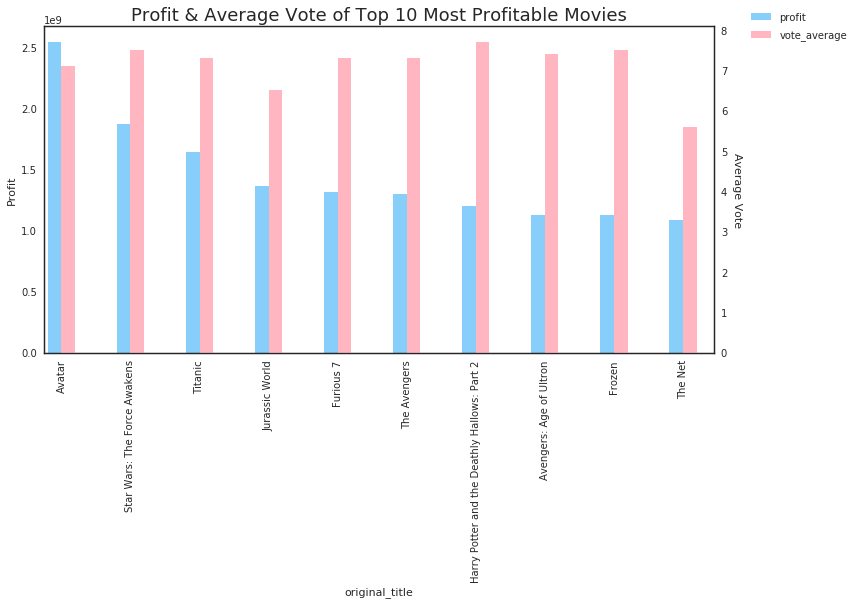

In [22]:
sns.set(style="white")
fig = plt.figure(figsize=(12,6)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() #dual axis

top_10.profit.plot(kind='bar', color='lightskyblue', ax=ax, width=0.2, position=1)
top_10.vote_average.plot(kind='bar', color='lightpink', ax=ax2, width=0.2, position=0)

plt.title('Profit & Average Vote of Top 10 Most Profitable Movies', fontsize=18)
ax.set_ylabel('Profit')
ax2.set_ylabel('Average Vote',rotation=270,labelpad=15)
ax.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


<font color='red'>**Observation:**</font> Among the top 10 most profitable movies, Avatar ranks top 1 while Harry Potter and the Deathly Hallows: Part 2 ranks number 7 but with relatively higher average vote.

In [23]:
# # Alternative method of creating bar chat
# # Covert the wide format to long format
# top_10_melt = pd.melt(top_10,id_vars=['original_title'],var_name='metrics', value_name='values')

# sns.set(style="whitegrid")
# f, ax = plt.subplots(figsize=(12,6))
# sns.barplot(x='values', y='original_title', data=top_10_melt, hue='metrics', color='b')

### Research Question 2 : What does the trend of average profit and average vote by year look like?

In [24]:
yearly_agg = df.groupby('release_year')['profit','vote_average'].mean()
# get the most recent 26-year data for more accurate comparison 
yearly_agg_26 = yearly_agg.loc[yearly_agg.index>=1990]
yearly_agg_26

,profit,vote_average
release_year,,
1990,6.518689e+07,6.235849
1991,6.096243e+07,6.184000
1992,7.307634e+07,6.288679
1993,6.355317e+07,6.245833
1994,7.587717e+07,6.085484
1995,6.923578e+07,6.140741
1996,5.507705e+07,6.059302
1997,7.089157e+07,6.152222
1998,5.732767e+07,6.177174


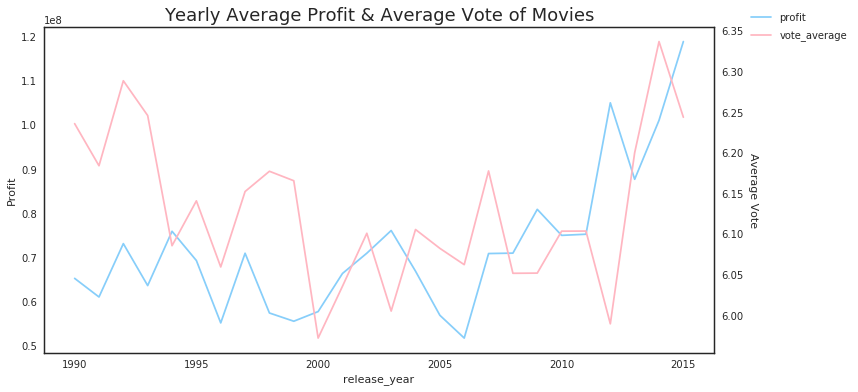

In [25]:
sns.set(style="white")
fig = plt.figure(figsize=(12,6)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() #dual axis

yearly_agg_26.profit.plot(color='lightskyblue', ax=ax)
yearly_agg_26.vote_average.plot(color='lightpink', ax=ax2)

plt.title('Yearly Average Profit & Average Vote of Movies', fontsize=18)
ax.set_ylabel('Profit')
ax2.set_ylabel('Average Vote',rotation=270,labelpad=15)

ax.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [30]:
(yearly_agg_26.profit.iloc[-1]-yearly_agg_26.profit.iloc[0])/yearly_agg_26.profit.iloc[0]

0.82476744645641642

<font color='red'>**Observation:**</font> From year 1990 to 2015, the average profit shows an overall trend with a dramatic increase by 82%, while the average vote has been greatly fluctuated during years. The movies released in year 2015 have generated the most profit on average while the movies released in year 2014 got the highest average vote.     

### Research Question 3 : What is the relationship between profit and average vote for a movie?

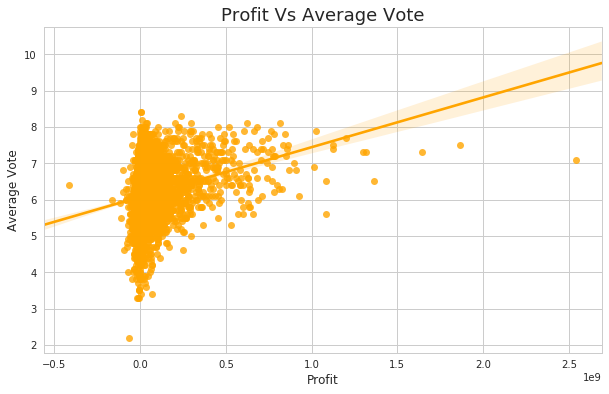

In [52]:
ax = sns.regplot(x=df['profit'], y=df['vote_average'],color='orange')

#set the title and labels of the figure
ax.set_title("Profit Vs Average Vote",fontsize=18)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Average Vote",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

In [51]:
print("Correlation Between Profit And Average Vote: ",round(df['profit'].corr(df['vote_average']),2))

Correlation Between Profit And Average Vote:  0.26


<font color='red'>**Observation:**</font> The correlation 0.26 shows a weak positive relationship between a movie's profit and its average rating.

<a id='conclusions'></a>
## Conclusions

> 1. Although Avatar is the most profitable movie, it doesn't bring the highest average rating from the audiences.
> 2. Overall the movie's profit has greatly risen with years, but the movie's average vote has fluctuated a lot with years without showing an increasing trend. 
> 3. A profitable movie doesn't imply a higher average rating, while the movie with high average rating doesn't mean that it would generate more profit. 

## Limitations
> 1. The conclusion is only based on the overall analysis, so this might change with in-depth analysis for different segements such as movie's genre or runtime. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0